In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import attila_utils

In [2]:
group2condition1 = {
    'A': 'WT',
    'B': '5xFAD',
    'C': '5xFAD + Amiloride 10',
}

group2condition2 = {
    'D': '5xFAD',
    'A': '5xFAD + Amiloride 12',
    'B': '5xFAD + HCQ',
    'C': '5xFAD + HCQ nano',
    'E': '5xFAD + R-HCQ',
    'F': '5xFAD + S-HCQ',
    'G': '5xFAD + TUDCA',
    'H': 'WT',
    'I': 'WT + TUDCA',
    'J': 'WT + DMSO',
}

In [18]:
def read_data(fpath, g2c):
    data = pd.read_excel(fpath, sheet_name='Y-Maze')
    data['Condition'] = pd.Categorical(data.Group.apply(lambda x: g2c[x]), categories=list(g2c.values()), ordered=True)
    return(data)

data1 = read_data('../../resources/QPS/5xFAD-mouse/CO26990-behavioral-data-cleaned.xlsx', group2condition1)
data1

,Cohort,Group,Sex,IRN,Distance m,Correct Entries n,Correct Entries %,Entries n,Remarks,Condition
0,I,A,f,12913 A,18.34840,12,33.333333,36,-,WT
1,I,A,f,12915 A,17.52170,18,54.545455,33,-,WT
2,II,A,f,12937 A,15.50840,12,60.000000,20,-,WT
3,II,A,f,12955 A,13.96700,7,43.750000,16,-,WT
4,II,A,f,12957 A,14.34980,12,63.157895,19,-,WT
5,II,A,f,12961 A,16.53460,16,69.565217,23,-,WT
6,II,A,f,12967 A,15.88770,11,61.111111,18,-,WT
7,II,A,f,12979 A,17.08600,10,40.000000,25,-,WT
8,I,A,m,14138,16.74750,15,60.000000,25,-,WT
9,I,A,m,14142,9.65409,8,66.666667,12,-,WT


In [19]:
data2 = read_data('../../resources/QPS/5xFAD-mouse/CO28152-behavioral-data-cleaned.xlsx', group2condition2)
data2

,Cohort,Group,Sex,IRN,"Total entries, week 12","Total entries, week 13","Correct entries %, week 12","Correct entries %, week 13",Condition
0,I,A,f,15117,9,32,33.333333,56.250000,5xFAD + Amiloride 12
1,I,A,f,15119,46,52,63.043478,42.307692,5xFAD + Amiloride 12
2,I,A,f,15121,13,39,69.230769,33.333333,5xFAD + Amiloride 12
3,I,A,f,14627 A,14,21,64.285714,57.142857,5xFAD + Amiloride 12
4,I,A,f,14687 A,36,35,52.777778,51.428571,5xFAD + Amiloride 12
...,...,...,...,...,...,...,...,...,...
140,V,J,m,16182,16,32,62.500000,40.625000,WT + DMSO
141,V,J,m,16192,37,27,48.648649,66.666667,WT + DMSO
142,VI,J,m,16220,23,20,69.565217,45.000000,WT + DMSO
143,VI,J,m,16226,15,17,60.000000,41.176471,WT + DMSO


In [23]:
def my_boxplot(data, x='Correct entries %, week 12'):
    fig, ax = plt.subplots()
    sns.boxplot(data, x=x, y='Condition', ax=ax)
    sns.stripplot(data, x=x, y='Condition', ax=ax, color='lightgray', edgecolor='gray', linewidth=1)
    return((fig, ax))

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


['named-figure/pct-correct-entries-boxplot-CO26990.png',
 'named-figure/pct-correct-entries-boxplot-CO26990.pdf']

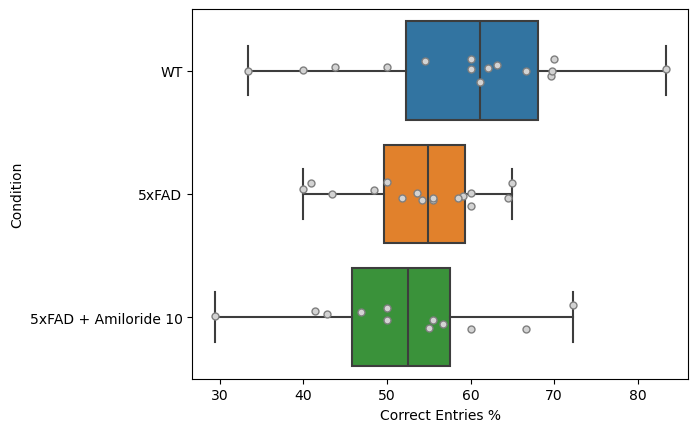

In [27]:
fig, ax = my_boxplot(data1, 'Correct Entries %')
attila_utils.savefig(fig, 'pct-correct-entries-boxplot-CO26990')

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


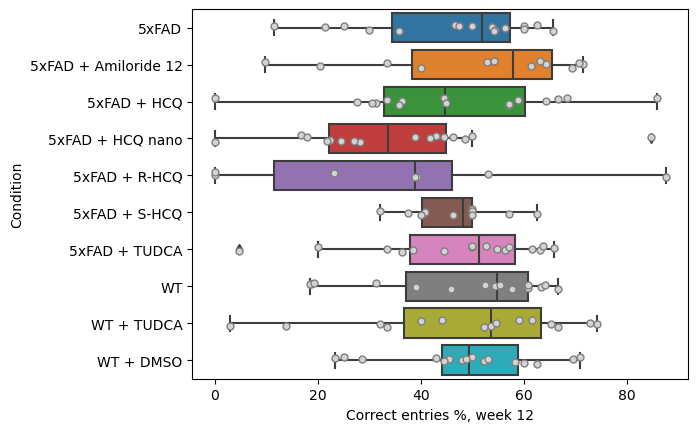

In [25]:
fig, ax = my_boxplot(data2, 'Correct entries %, week 12')
attila_utils.savefig(fig, 'pct-correct-entries-boxplot-CO28152')

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


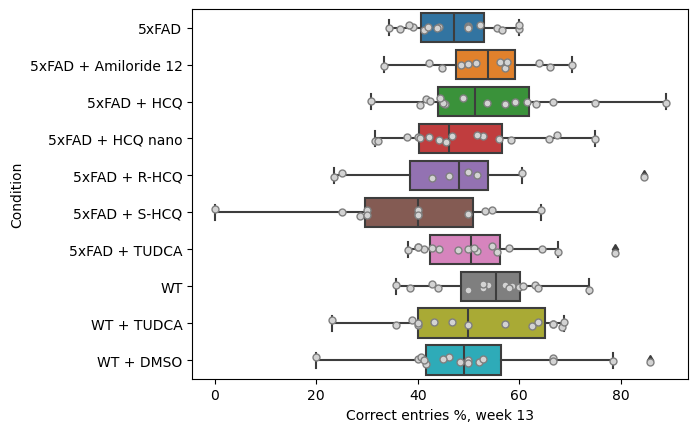

In [26]:
fig, ax = my_boxplot(data2, 'Correct entries %, week 13')

In [6]:
%connect_info

{
  "shell_port": 54215,
  "iopub_port": 54216,
  "stdin_port": 54217,
  "control_port": 54219,
  "hb_port": 54218,
  "ip": "127.0.0.1",
  "key": "f2baa293-87831029b50855a433050324",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3",
  "jupyter_session": "/Users/jonesa7/CTNS/notebooks/2024-02-29-Y-maze/Untitled.ipynb"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-afbac761-9609-49d4-8472-57e51f425ad8.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
